# Feature Scaling

While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized, intuitively we can think of **Principle Component Analysis (PCA)** as being a prime example of when normalization is important. In PCA we are interested in the components that maximize the variance. **If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos)**, PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are **not scaled**. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly **incorrect**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We will use a small dataset that contains (Physics,Biology and Maths) marks of a classroom of students.

In [2]:
df = pd.read_csv("data/grades.csv",index_col=0)

Show the first 5 rows of data.

In [3]:
df.head()

,Physics,Biology,Maths
Name,,,
Arnold,80,78,70
Bob,60,98,45
Cassandra,34,56,65
Donovan,56,65,32
Emily,98,23,55


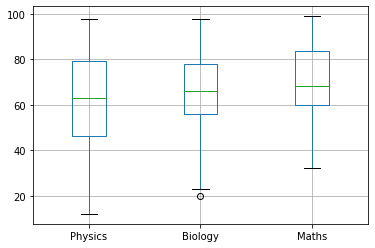

In [4]:
df.boxplot()

We will use scaling functions from scikit learn to perform some preprocessing techniques to scale our data. 

**Min-Max normalization** involves scaling features to lie between a given minimum and maximum value, often between zero and one.

In [5]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

We will use Min-Max Scaling to scale all the columns of data.

In [6]:
data_scaled=scaler.fit_transform(df)

Transform the numpy array containing our scaled data into a pandas data frame.

In [7]:
df_new=pd.DataFrame(data_scaled,index=df.index)

In [8]:
df_new.head()

,0,1,2
Name,,,
Arnold,0.790698,0.743590,0.567164
Bob,0.558140,1.000000,0.194030
Cassandra,0.255814,0.461538,0.492537
Donovan,0.511628,0.576923,0.000000
Emily,1.000000,0.038462,0.343284


As you can see, our values are scaled into a *range from 0 to 1*.

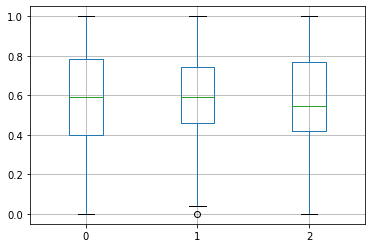

In [9]:
df_new.boxplot()

Another common scaling technique is the **Standard Scaler**.
Standard Scaler Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

**Standardization** of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

In [10]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [11]:
data_scaled=scaler.fit_transform(df)
df_new=pd.DataFrame(data_scaled,index=df.index)
df_new.head()

,0,1,2
Name,,,
Arnold,0.727807,0.523052,0.013572
Bob,-0.169017,1.477393,-1.456760
Cassandra,-1.334888,-0.526723,-0.280494
Donovan,-0.348382,-0.097269,-2.221333
Emily,1.534948,-2.101384,-0.868627


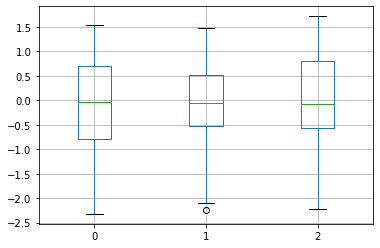

In [12]:
df_new.boxplot()